### This notebook takes the estimated template spectrum for 51 Pegasi and applies the Absorption Feature Finder algorithm to it.

# Visualize Estimated Template

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
%matplotlib notebook

In [3]:
filenames = [f for f in glob.glob("*ctd.csv")]
SPECTRA = [pd.read_csv(f) for f in filenames]

In [4]:
template = pd.read_csv("217014smoothtemp.csv")

<IPython.core.display.Javascript object>


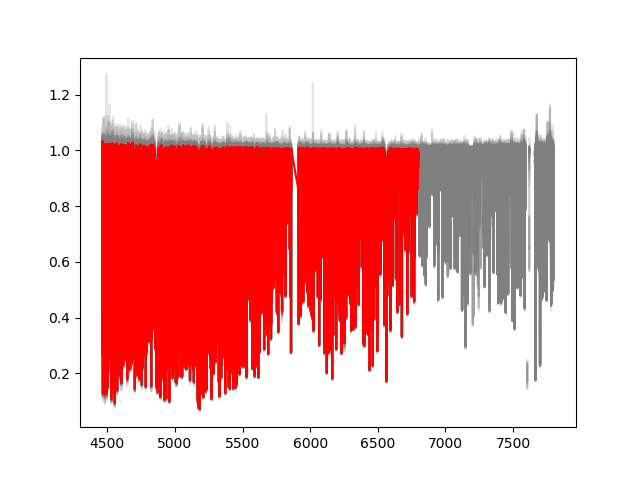

In [8]:
for tau in range(len(SPECTRA)):
    plt.plot(SPECTRA[tau].Wavelength.values, SPECTRA[tau].Flux.values, c='gray', alpha=0.2)
plt.plot(template.Wavelength.values, template.Flux.values, c='r')
plt.show()

# Find Absorption Features using the Estimated Template

In [6]:
from spectra_functions import findabsorptionfeatures

In [11]:
#downsample the template to have the same resolution as an individual spectrum
idx = 3*np.arange(int(len(template.Wavelength.values)/3))
twvl = template.Wavelength.values[idx]
tflx = template.Flux.values[idx]

In [24]:
wvbounds, minwvs, minflxs, maxflxs = findabsorptionfeatures(twvl, tflx,
                                                            pix_range=7, minlinedepth=0.015, alpha=0.07, gamma=0.05)

In [25]:
len(wvbounds)

4190

<IPython.core.display.Javascript object>


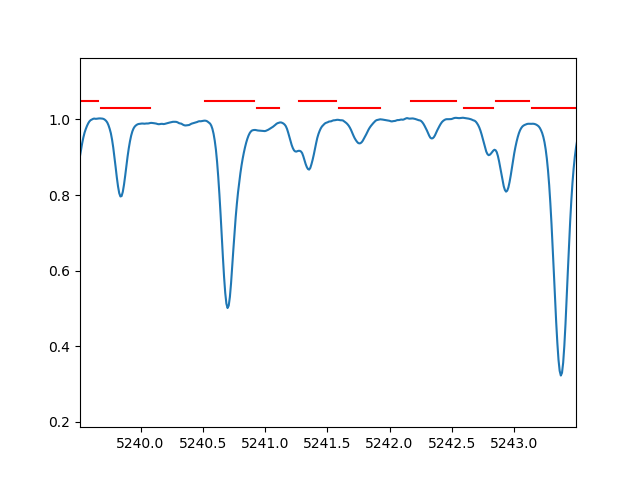

In [26]:
plt.plot(twvl[practice], tflx[practice])
for i in range(len(wvbounds)):
    if i%2 == 0:
        plt.plot(wvbounds[i], (1.05, 1.05), c='red')
    else:
        plt.plot(wvbounds[i], (1.03, 1.03), c='red')
plt.show()

In [27]:
wvlbnds = []
wvubnds = []
minflxs2 = []
minwvs2 = []
maxflxs2 = []
for i in range(len(wvbounds)):
    rng = np.where((template.Wavelength.values >= wvbounds[i][0]) & (template.Wavelength.values <= wvbounds[i][1]))[0]
    nans = np.where(np.isnan(template.Flux.values[rng]))[0]
    if len(nans) == 0:
        wvlbnds.append(wvbounds[i][0])
        wvubnds.append(wvbounds[i][1])
        minflxs2.append(minflxs[i])
        minwvs2.append(minwvs[i])
        maxflxs2.append(maxflxs[i])
Features = pd.DataFrame({"Wv_lbounds": wvlbnds, "Wv_ubounds": wvubnds, "Minflux": minflxs2, "MinWvl": minwvs2, "Maxflux": maxflxs2})
Features.to_csv("Features.csv")

<IPython.core.display.Javascript object>


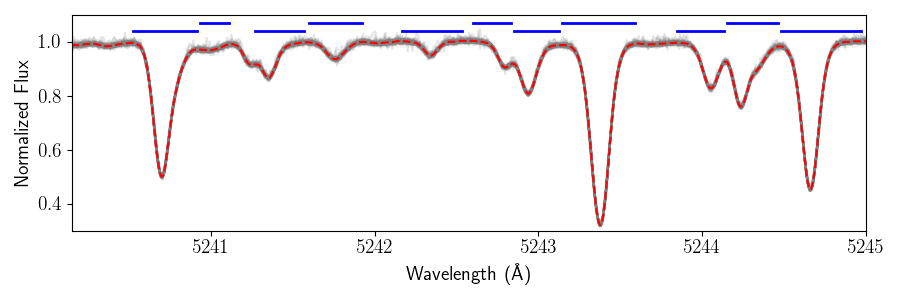

In [30]:
plt.figure(figsize=(9,3))
plt.rc('text', usetex=True)
plt.gcf().subplots_adjust(bottom=0.18)
for tau in range(len(SPECTRA)):
    rng = np.where((SPECTRA[tau].Wavelength.values >= 5200) & (SPECTRA[tau].Wavelength.values <= 5300))[0]
    plt.plot(SPECTRA[tau].Wavelength.values[rng], SPECTRA[tau].Flux.values[rng], c='gray', alpha=0.2)
rng = np.where((template.Wavelength.values >= 5200) & (template.Wavelength.values <= 5300))[0]
plt.plot(template.Wavelength.values[rng], template.Flux.values[rng], c='r', ls='--')
frng = np.where((Features.MinWvl.values >= 5200) & (Features.MinWvl.values <= 5300))[0]
for i in range(len(frng)):
    if i%2 == 0:
        plt.plot((Features.Wv_lbounds.values[frng[i]], Features.Wv_ubounds.values[frng[i]]), (1.04, 1.04), c='blue', lw=2)
    else:
        plt.plot((Features.Wv_lbounds.values[frng[i]], Features.Wv_ubounds.values[frng[i]]), (1.07, 1.07), c='blue', lw=2)
plt.xlim(5240.15, 5245)
plt.ylim(0.3, 1.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"Wavelength (\AA)", fontsize=14)
plt.ylabel(r"Normalized Flux", fontsize=14)
plt.tight_layout()
plt.savefig("TemplateSpec_Ftrs")
plt.show()